In [32]:

# 1 Cargar el archivo y normalizar los nombres

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Reemplaza el nombre del archivo con el que quieres evaluar y modificar
nombre_archivo = "Accesos Por Tecnología.csv"

# Ruta completa al archivo
ruta_completa = os.path.join(r"C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO", nombre_archivo)

# Verificar si el archivo existe antes de cargarlo
if os.path.exists(ruta_completa):
	# Cargar el archivo CSV
	df = pd.read_csv(ruta_completa)
	print("Archivo cargado exitosamente.")
else:
	print(f"Error: El archivo '{ruta_completa}' no existe.")



Archivo cargado exitosamente.


In [34]:
# Verificar si existe la columna "Trimestre"
if 'Trimestre' in df.columns:
    # Convertir la columna "Trimestre" a valores numéricos, forzando errores a NaN
    df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce')
    
    # Revisar si hay valores negativos en "Trimestre"
    if (df['Trimestre'] < 0).any():
        print(f"Se encontraron {df['Trimestre'][df['Trimestre'] < 0].count()} valores negativos en 'Trimestre'. Corrigiéndolos a 0.")
        df.loc[df['Trimestre'] < 0, 'Trimestre'] = 0
    
    # Manejar valores nulos en "Trimestre" sin reemplazarlos con -1
    if df['Trimestre'].isnull().any():
        print(f"Se encontraron {df['Trimestre'].isnull().sum()} valores nulos en 'Trimestre'. No se reemplazarán con -1.")
    
    # Establecer condiciones basadas en la columna "Año"
    if 'Año' in df.columns:
        # Si no existe fecha en "Año", colocar 0 en "Trimestre"
        df.loc[df['Año'].isnull() & df['Trimestre'].isnull(), 'Trimestre'] = 0
        # Si hay fecha en "Año" pero no registro en "Trimestre", colocar 5
        df.loc[df['Año'].notnull() & df['Trimestre'].isnull(), 'Trimestre'] = 5

    # Intentar convertir la columna "Trimestre" a tipo int64
    try:
        df['Trimestre'] = df['Trimestre'].astype(int)
        print("La columna 'Trimestre' ha sido convertida a int.")
    except ValueError as e:
        print(f"No se pudo convertir la columna 'Trimestre' a int debido a un error: {e}")
else:
    print("La columna 'Trimestre' no existe en el DataFrame.")


Se encontraron 74 valores nulos en 'Trimestre'. No se reemplazarán con -1.
La columna 'Trimestre' ha sido convertida a int.


In [35]:
print(df.head())

          Año  Trimestre        Provincia      ADSL  Cablemodem  Fibra óptica  \
0  2024-01-01          2     Buenos Aires  214055.0   2722466.0     1849476.0   
1  2024-01-01          2  Capital Federal   54102.0   1144781.0      230402.0   
2  2024-01-01          2        Catamarca    4951.0     10303.0       58355.0   
3  2024-01-01          2            Chaco    9448.0     57935.0       68944.0   
4  2024-01-01          2           Chubut   25955.0     80704.0       26516.0   

   Wireless    Otros      Total  
0  138638.0  64745.0  4989380.0  
1    4493.0  29821.0  1463599.0  
2    1384.0     81.0    75074.0  
3    8407.0   2358.0   147092.0  
4   31118.0   9930.0   174223.0  


In [36]:
# Crear la columna 'Trimestre_Label' basada en 'Trimestre'
if 'Trimestre' in df.columns:
    # Asegurar que 'Trimestre' no tenga valores nulos ni valores fuera del rango esperado (1-4)
    df['Trimestre'] = df['Trimestre'].fillna(-1)  # Rellena nulos con -1 para evitar errores
    df['Trimestre'] = pd.to_numeric(df['Trimestre'], errors='coerce').fillna(-1).astype(int)  # Convertir a numérico y manejar errores

    # Mapear los valores de trimestre a etiquetas descriptivas
    trimestre_labels = {1: 'Q1', 2: 'Q2', 3: 'Q3', 4: 'Q4'}
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels).fillna('Sin etiqueta')  # Agregar etiqueta para valores no válidos
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.")
else:
    print("La columna 'Trimestre' no existe. No se pudo crear 'Trimestre_Label'.")
    # Identificar y reemplazar valores nulos por la moda en todas las columnas
    for columna in df.columns:
        if df[columna].isnull().any():
            moda = df[columna].mode()[0]
            df[columna].fillna(moda, inplace=True)
            print(f"Valores nulos en la columna '{columna}' han sido reemplazados por la moda: {moda}")

    # Crear la columna 'Trimestre_Label' basada en 'Trimestre' nuevamente después de reemplazar nulos
    df['Trimestre_Label'] = df['Trimestre'].map(trimestre_labels).fillna('Sin etiqueta')
    print("Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas después de reemplazar nulos.")

Se ha creado la columna 'Trimestre_Label' con etiquetas descriptivas.


In [37]:
# Mostrar información básica del DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Año              935 non-null    object 
 1   Trimestre        1009 non-null   int64  
 2   Provincia        1007 non-null   object 
 3   ADSL             1007 non-null   float64
 4   Cablemodem       1007 non-null   float64
 5   Fibra óptica     1007 non-null   float64
 6   Wireless         1007 non-null   float64
 7   Otros            1007 non-null   float64
 8   Total            1007 non-null   float64
 9   Trimestre_Label  1009 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 79.0+ KB
None


In [38]:
# Normalizar los nombres de columnas si existen
columnas_a_normalizar = ['Provincia', 'Partido', 'Localidad']
for columna in columnas_a_normalizar:
    if columna in df.columns:
        df[columna] = df[columna].str.strip().str.upper()


In [39]:
# 2: Reemplazar variaciones específicas

# Reemplazar variaciones específicas en 'Provincia' si existe
if 'Provincia' in df.columns:
    df['Provincia'] = df['Provincia'].replace({
        'BS AS': 'BUENOS AIRES',
        'CABA': 'BUENOS AIRES',
        'CIUDAD AUTONOMA DE BUENOS AIRES': 'BUENOS AIRES',
        'CAPITAL FEDERAL': 'BUENOS AIRES',
        'CORDOBA': 'CÓRDOBA',
        'ENTRE RIOS': 'ENTRE RÍOS',
        'RIO NEGRO': 'RÍO NEGRO',
        'TUCUMAN': 'TUCUMÁN',
        'NEUQUEN': 'NEUQUÉN'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Provincia' después de los reemplazos:")
    print(df['Provincia'].unique())
else:
    print("La columna 'Provincia' no existe en el DataFrame.")

# Reemplazar valores en 'Partido' si existe
if 'Partido' in df.columns:
    df['Partido'] = df['Partido'].replace({
        'SAN ISIDRO': 'SAN ISIDRO',
        'TIGRE': 'TIGRE'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Partido' después de los reemplazos:")
    print(df['Partido'].unique())
else:
    print("La columna 'Partido' no existe en el DataFrame.")

# Reemplazar valores en 'Localidad' si existe
if 'Localidad' in df.columns:
    df['Localidad'] = df['Localidad'].replace({
        'VICENTE LOPEZ': 'VICENTE LÓPEZ',
        'SAN FERNANDO': 'SAN FERNANDO'
        # Agrega más reemplazos según sea necesario
    })
    print("\nValores únicos en 'Localidad' después de los reemplazos:")
    print(df['Localidad'].unique())
else:
    print("La columna 'Localidad' no existe en el DataFrame.")



Valores únicos en 'Provincia' después de los reemplazos:
['BUENOS AIRES' 'CATAMARCA' 'CHACO' 'CHUBUT' 'CÓRDOBA' 'CORRIENTES'
 'ENTRE RÍOS' 'FORMOSA' 'JUJUY' 'LA PAMPA' 'LA RIOJA' 'MENDOZA' 'MISIONES'
 'NEUQUÉN' 'RÍO NEGRO' 'SALTA' 'SAN JUAN' 'SAN LUIS' 'SANTA CRUZ'
 'SANTA FE' 'SANTIAGO DEL ESTERO' 'TIERRA DEL FUEGO' 'TUCUMÁN' nan]
La columna 'Partido' no existe en el DataFrame.
La columna 'Localidad' no existe en el DataFrame.



Estadísticas descriptivas del DataFrame (incluyendo todas las columnas):
               Año    Trimestre     Provincia          ADSL    Cablemodem  \
count          935  1009.000000          1007  1.007000e+03  1.007000e+03   
unique          11          NaN            23           NaN           NaN   
top     2023-01-01          NaN  BUENOS AIRES           NaN           NaN   
freq            96          NaN            83           NaN           NaN   
mean           NaN     2.306244           NaN  1.129309e+05  1.821583e+05   
std            NaN     1.266311           NaN  2.362922e+05  4.460058e+05   
min            NaN     0.000000           NaN  2.230000e+03  0.000000e+00   
25%            NaN     1.000000           NaN  1.978950e+04  1.102050e+04   
50%            NaN     2.000000           NaN  4.396700e+04  4.075000e+04   
75%            NaN     3.000000           NaN  8.722000e+04  7.678350e+04   
max            NaN     4.000000           NaN  1.586343e+06  2.797700e+06   

 

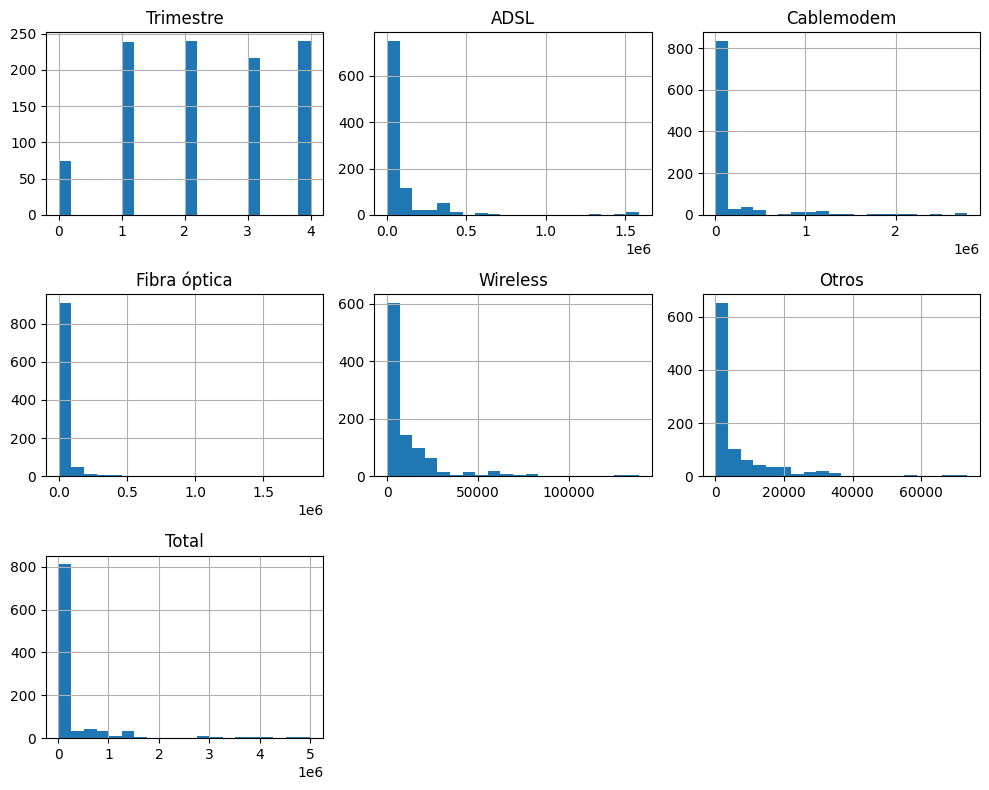

In [40]:
# 3: Estadísticas descriptivas y análisis exploratorio

# Estadísticas descriptivas para columnas numéricas y de tipo object
print("\nEstadísticas descriptivas del DataFrame (incluyendo todas las columnas):")
print(df.describe(include='all'))

# Histogramas de las columnas numéricas
df.select_dtypes(include=[np.number]).hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()


Matriz de correlación entre columnas numéricas:
              Trimestre      ADSL  Cablemodem  Fibra óptica  Wireless  \
Trimestre      1.000000 -0.009971    0.007472      0.025858  0.009657   
ADSL          -0.009971  1.000000    0.661300      0.258930  0.297446   
Cablemodem     0.007472  0.661300    1.000000      0.782609  0.654825   
Fibra óptica   0.025858  0.258930    0.782609      1.000000  0.770046   
Wireless       0.009657  0.297446    0.654825      0.770046  1.000000   
Otros         -0.022276  0.447779    0.798114      0.697462  0.711030   
Total          0.007045  0.756485    0.981026      0.784807  0.677550   

                 Otros     Total  
Trimestre    -0.022276  0.007045  
ADSL          0.447779  0.756485  
Cablemodem    0.798114  0.981026  
Fibra óptica  0.697462  0.784807  
Wireless      0.711030  0.677550  
Otros         1.000000  0.785448  
Total         0.785448  1.000000  


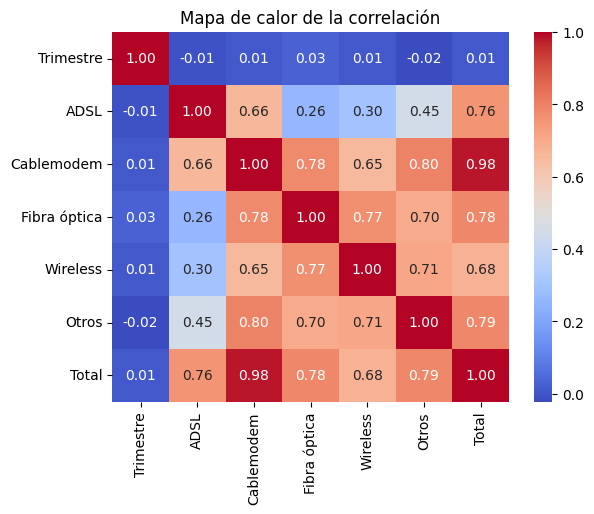

In [41]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['number'])

# Verificar si hay columnas numéricas antes de calcular la correlación
if not df_numerico.empty:
    # Calcular la matriz de correlación
    correlacion = df_numerico.corr()

    # Imprimir la matriz de correlación
    print("\nMatriz de correlación entre columnas numéricas:")
    print(correlacion)

    # Visualizar el mapa de calor de la correlación
    sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Mapa de calor de la correlación")
    plt.show()
else:
    print("\nNo hay columnas numéricas en el DataFrame para calcular la correlación.")


In [42]:
# Correlación entre columnas no numéricas usando tablas de contingencia
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)

Tabla de contingencia entre Año y Provincia:
Provincia   BUENOS AIRES  CATAMARCA  CHACO  CHUBUT  CORRIENTES  CÓRDOBA  \
Año                                                                       
2014-01-01             8          4      4       4           4        4   
2015-01-01             8          4      4       4           4        4   
2016-01-01             8          4      4       4           4        4   
2017-01-01             8          4      4       4           4        4   
2018-01-01             8          4      4       4           4        4   
2019-01-01             2          1      1       1           1        1   
2020-01-01             8          4      4       4           4        4   
2021-01-01             8          4      4       4           4        4   
2022-01-01             8          4      4       4           4        4   
2023-01-01             8          4      4       4           4        4   
2024-01-01             3          2      2       2     

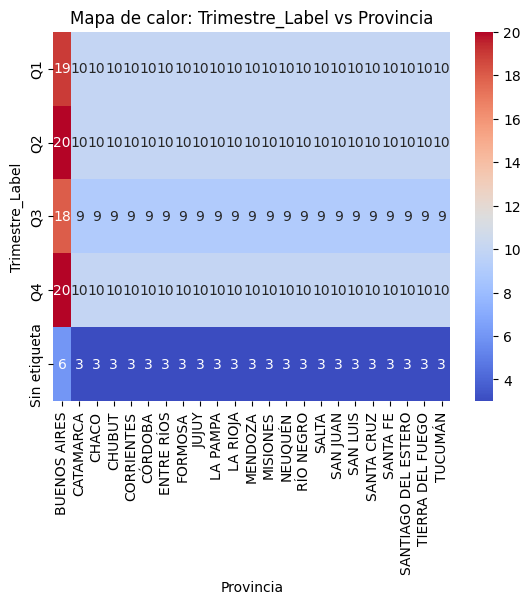

In [43]:
# Visualizar una tabla de contingencia específica como mapa de calor
tabla_contingencia = pd.crosstab(df['Trimestre_Label'], df['Provincia'])
sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
plt.title("Mapa de calor: Trimestre_Label vs Provincia")
plt.show()


Tabla de contingencia entre Año y Provincia:
Provincia   BUENOS AIRES  CATAMARCA  CHACO  CHUBUT  CORRIENTES  CÓRDOBA  \
Año                                                                       
2014-01-01             8          4      4       4           4        4   
2015-01-01             8          4      4       4           4        4   
2016-01-01             8          4      4       4           4        4   
2017-01-01             8          4      4       4           4        4   
2018-01-01             8          4      4       4           4        4   
2019-01-01             2          1      1       1           1        1   
2020-01-01             8          4      4       4           4        4   
2021-01-01             8          4      4       4           4        4   
2022-01-01             8          4      4       4           4        4   
2023-01-01             8          4      4       4           4        4   
2024-01-01             3          2      2       2     

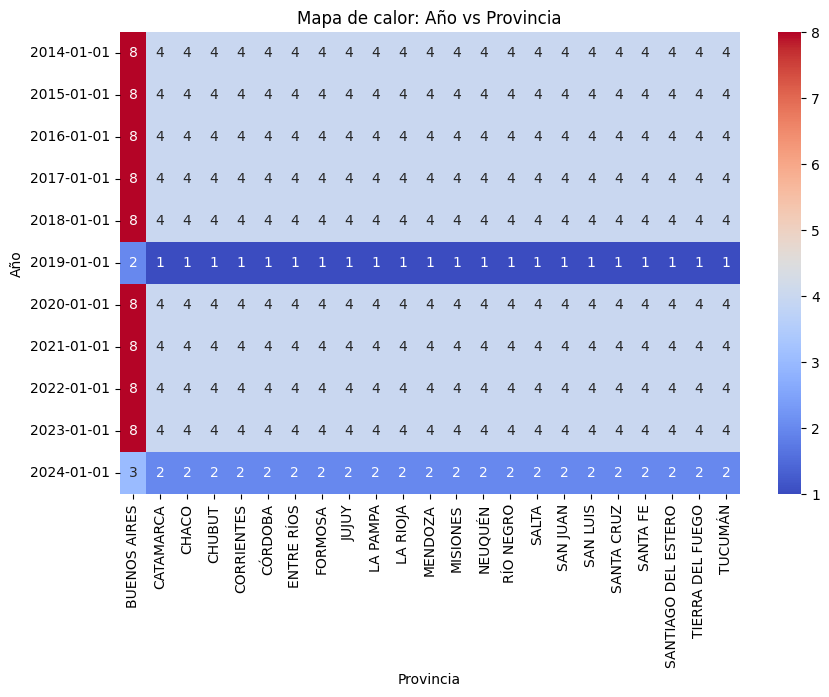

Tabla de contingencia entre Año y Trimestre_Label:
Trimestre_Label  Q1  Q2  Q3  Q4
Año                            
2014-01-01       24  24  24  24
2015-01-01       24  24  24  24
2016-01-01       24  24  24  24
2017-01-01       24  24  24  24
2018-01-01       24  24  24  24
2019-01-01        0   0   0  24
2020-01-01       24  24  24  24
2021-01-01       24  24  24  24
2022-01-01       24  24  24  24
2023-01-01       24  24  24  24
2024-01-01       23  24   0   0


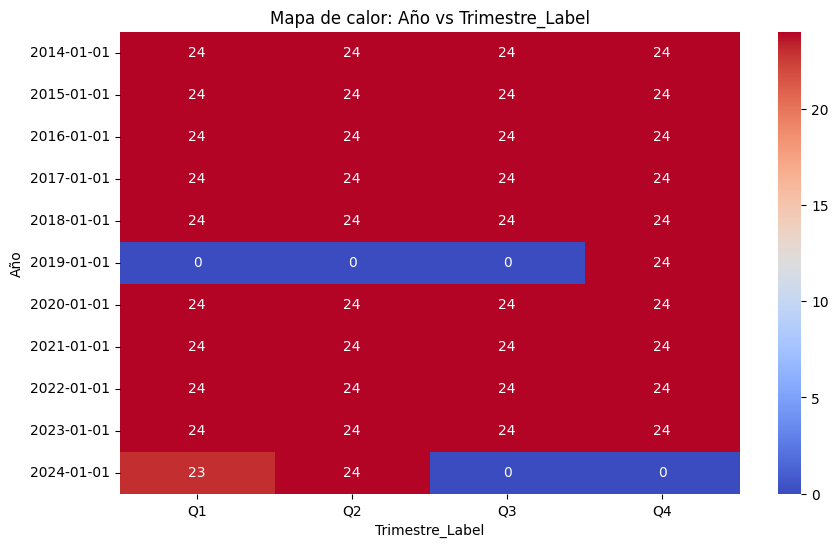

Tabla de contingencia entre Provincia y Año:
Año                  2014-01-01  2015-01-01  2016-01-01  2017-01-01  \
Provincia                                                             
BUENOS AIRES                  8           8           8           8   
CATAMARCA                     4           4           4           4   
CHACO                         4           4           4           4   
CHUBUT                        4           4           4           4   
CORRIENTES                    4           4           4           4   
CÓRDOBA                       4           4           4           4   
ENTRE RÍOS                    4           4           4           4   
FORMOSA                       4           4           4           4   
JUJUY                         4           4           4           4   
LA PAMPA                      4           4           4           4   
LA RIOJA                      4           4           4           4   
MENDOZA                       4 

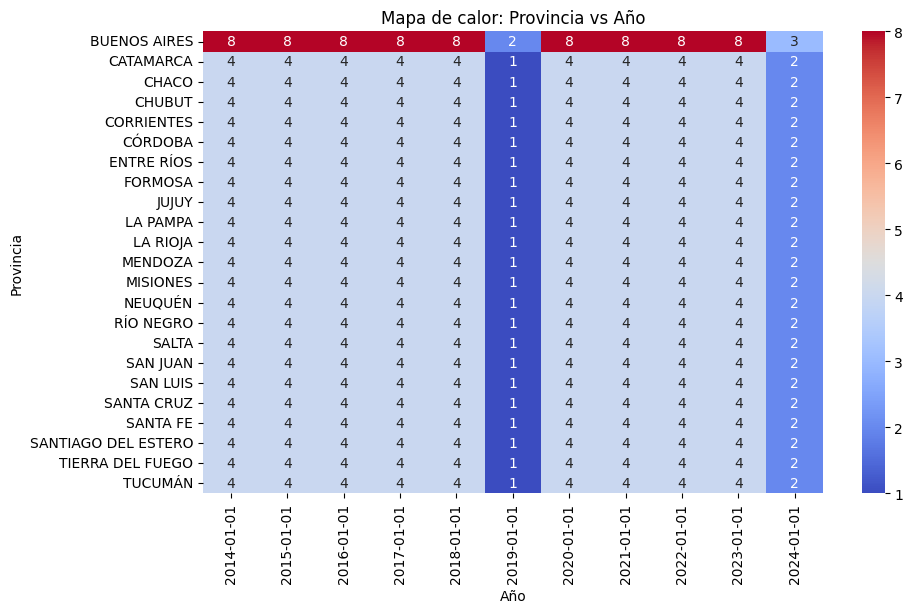

Tabla de contingencia entre Provincia y Trimestre_Label:
Trimestre_Label      Q1  Q2  Q3  Q4  Sin etiqueta
Provincia                                        
BUENOS AIRES         19  20  18  20             6
CATAMARCA            10  10   9  10             3
CHACO                10  10   9  10             3
CHUBUT               10  10   9  10             3
CORRIENTES           10  10   9  10             3
CÓRDOBA              10  10   9  10             3
ENTRE RÍOS           10  10   9  10             3
FORMOSA              10  10   9  10             3
JUJUY                10  10   9  10             3
LA PAMPA             10  10   9  10             3
LA RIOJA             10  10   9  10             3
MENDOZA              10  10   9  10             3
MISIONES             10  10   9  10             3
NEUQUÉN              10  10   9  10             3
RÍO NEGRO            10  10   9  10             3
SALTA                10  10   9  10             3
SAN JUAN             10  10   9  10        

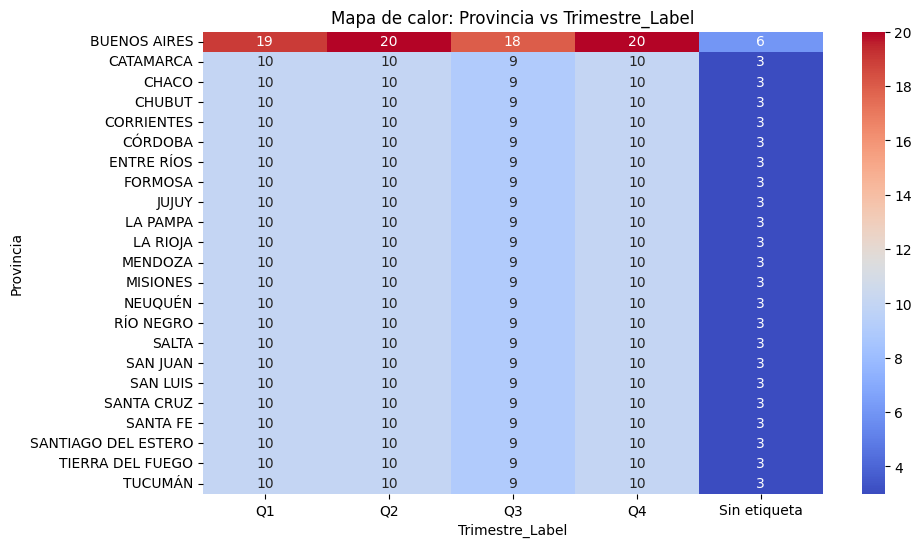

Tabla de contingencia entre Trimestre_Label y Año:
Año              2014-01-01  2015-01-01  2016-01-01  2017-01-01  2018-01-01  \
Trimestre_Label                                                               
Q1                       24          24          24          24          24   
Q2                       24          24          24          24          24   
Q3                       24          24          24          24          24   
Q4                       24          24          24          24          24   

Año              2019-01-01  2020-01-01  2021-01-01  2022-01-01  2023-01-01  \
Trimestre_Label                                                               
Q1                        0          24          24          24          24   
Q2                        0          24          24          24          24   
Q3                        0          24          24          24          24   
Q4                       24          24          24          24          24   


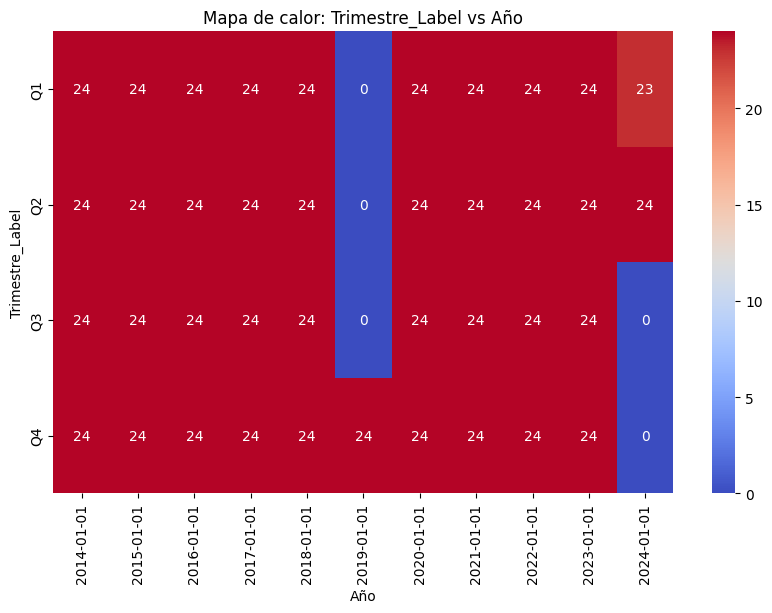

Tabla de contingencia entre Trimestre_Label y Provincia:
Provincia        BUENOS AIRES  CATAMARCA  CHACO  CHUBUT  CORRIENTES  CÓRDOBA  \
Trimestre_Label                                                                
Q1                         19         10     10      10          10       10   
Q2                         20         10     10      10          10       10   
Q3                         18          9      9       9           9        9   
Q4                         20         10     10      10          10       10   
Sin etiqueta                6          3      3       3           3        3   

Provincia        ENTRE RÍOS  FORMOSA  JUJUY  LA PAMPA  ...  NEUQUÉN  \
Trimestre_Label                                        ...            
Q1                       10       10     10        10  ...       10   
Q2                       10       10     10        10  ...       10   
Q3                        9        9      9         9  ...        9   
Q4                       10

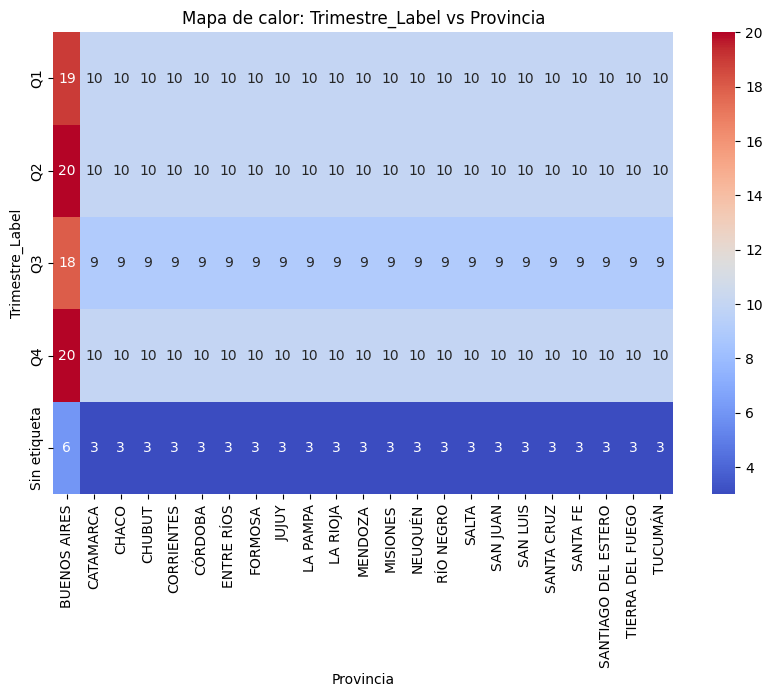

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Iterar sobre combinaciones de columnas categóricas (no numéricas)
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:  # Evitar el caso donde se compara una columna consigo misma
            # Crear tabla de contingencia
            tabla_contingencia = pd.crosstab(df[col1], df[col2])
            print(f"Tabla de contingencia entre {col1} y {col2}:")
            print(tabla_contingencia)
            
            # Visualizar la tabla como un mapa de calor
            plt.figure(figsize=(10, 6))
            sns.heatmap(tabla_contingencia, annot=True, cmap='coolwarm', fmt='d')
            plt.title(f"Mapa de calor: {col1} vs {col2}")
            plt.xlabel(col2)
            plt.ylabel(col1)
            plt.show()


In [45]:
#  6: Cálculo de Z-scores

from scipy.stats import zscore

# Calcular Z-scores para columnas numéricas
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)
print("\nZ-scores de las columnas numéricas:")
print(z_scores)


Z-scores de las columnas numéricas:
      Trimestre  ADSL  Cablemodem  Fibra óptica  Wireless  Otros  Total
0     -0.241959   NaN         NaN           NaN       NaN    NaN    NaN
1     -0.241959   NaN         NaN           NaN       NaN    NaN    NaN
2     -0.241959   NaN         NaN           NaN       NaN    NaN    NaN
3     -0.241959   NaN         NaN           NaN       NaN    NaN    NaN
4     -0.241959   NaN         NaN           NaN       NaN    NaN    NaN
...         ...   ...         ...           ...       ...    ...    ...
1004  -1.032047   NaN         NaN           NaN       NaN    NaN    NaN
1005  -1.032047   NaN         NaN           NaN       NaN    NaN    NaN
1006  -1.032047   NaN         NaN           NaN       NaN    NaN    NaN
1007  -1.822134   NaN         NaN           NaN       NaN    NaN    NaN
1008  -1.822134   NaN         NaN           NaN       NaN    NaN    NaN

[1009 rows x 7 columns]


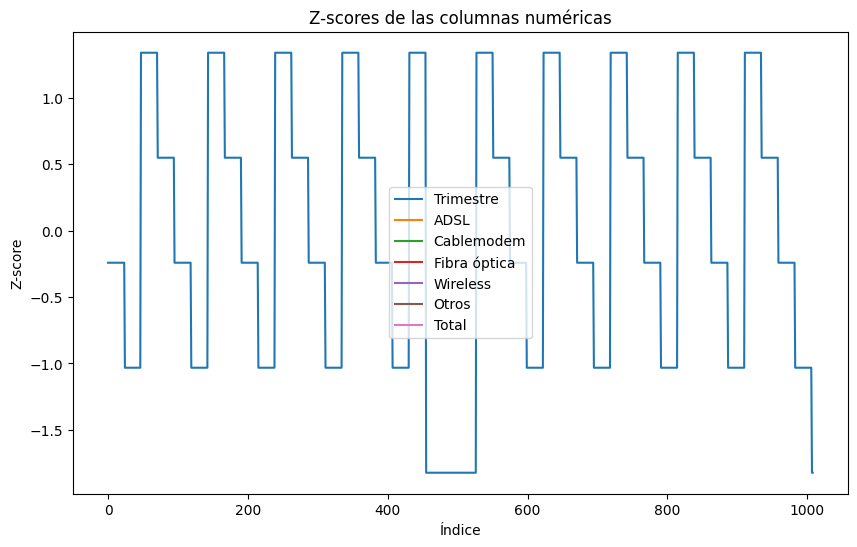

In [47]:
import matplotlib.pyplot as plt

# Graficar Z-scores de las columnas numéricas
plt.figure(figsize=(10, 6))
plt.plot(z_scores)
plt.title('Z-scores de las columnas numéricas')
plt.xlabel('Índice')
plt.ylabel('Z-score')
plt.legend(z_scores.columns)  # Para mostrar el nombre de cada columna en la leyenda
plt.show()


In [48]:
# Conteo de categorías en columnas de tipo object
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nConteo de categorías en la columna '{col}':")
    print(df[col].value_counts())


Conteo de categorías en la columna 'Año':
Año
2023-01-01    96
2022-01-01    96
2021-01-01    96
2015-01-01    96
2020-01-01    96
2018-01-01    96
2017-01-01    96
2014-01-01    96
2016-01-01    96
2024-01-01    47
2019-01-01    24
Name: count, dtype: int64

Conteo de categorías en la columna 'Provincia':
Provincia
BUENOS AIRES           83
CATAMARCA              42
CHACO                  42
CHUBUT                 42
CÓRDOBA                42
CORRIENTES             42
ENTRE RÍOS             42
FORMOSA                42
JUJUY                  42
LA PAMPA               42
LA RIOJA               42
MENDOZA                42
MISIONES               42
NEUQUÉN                42
RÍO NEGRO              42
SALTA                  42
SAN JUAN               42
SAN LUIS               42
SANTA CRUZ             42
SANTA FE               42
SANTIAGO DEL ESTERO    42
TIERRA DEL FUEGO       42
TUCUMÁN                42
Name: count, dtype: int64

Conteo de categorías en la columna 'Trimestre_Label':
Tr

In [49]:
# Revisar columnas con valores negativos
columnas_negativas = df.select_dtypes(include=[np.number]).columns[df.select_dtypes(include=[np.number]).lt(0).any()]
print("\nColumnas con valores negativos:")
print(columnas_negativas)


Columnas con valores negativos:
Index([], dtype='object')


In [50]:
# Verificar registros sin etiqueta en la columna 'Trimestre_Label'
sin_etiqueta = df[df['Trimestre_Label'] == 'Sin etiqueta']
print("\nRegistros sin etiqueta en 'Trimestre_Label':")
print(sin_etiqueta)



Registros sin etiqueta en 'Trimestre_Label':
      Año  Trimestre            Provincia       ADSL  Cablemodem  \
455   NaN          0         BUENOS AIRES  1277249.0   2144956.0   
456   NaN          0         BUENOS AIRES   300288.0   1080973.0   
457   NaN          0            CATAMARCA    24349.0      5543.0   
458   NaN          0                CHACO    50416.0     49156.0   
459   NaN          0               CHUBUT    37298.0     27090.0   
...   ...        ...                  ...        ...         ...   
524   NaN          0  SANTIAGO DEL ESTERO    25337.0     61547.0   
525   NaN          0     TIERRA DEL FUEGO    19789.0     23549.0   
526   NaN          0              TUCUMÁN   159215.0     11670.0   
1007  NaN          0                  NaN        NaN         NaN   
1008  NaN          0                  NaN        NaN         NaN   

      Fibra óptica  Wireless    Otros      Total Trimestre_Label  
455       425386.0   85572.0  27070.0  3960233.0    Sin etiqueta  
456

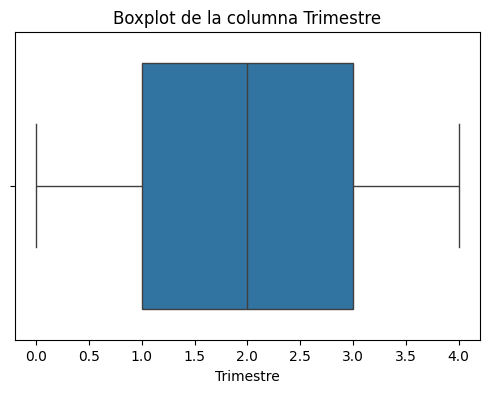

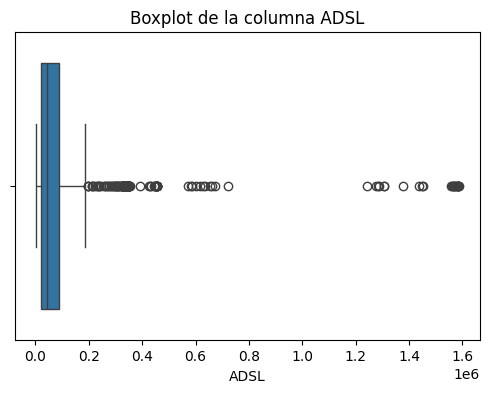

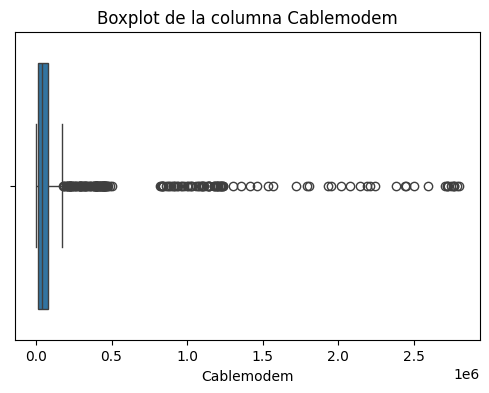

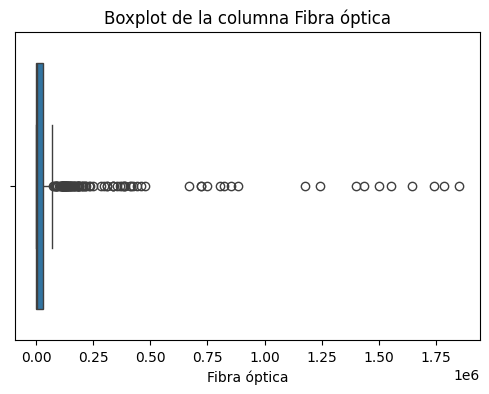

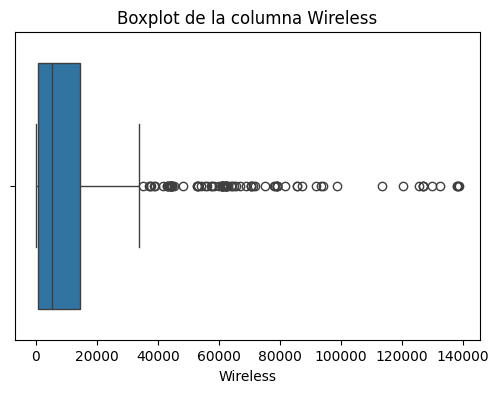

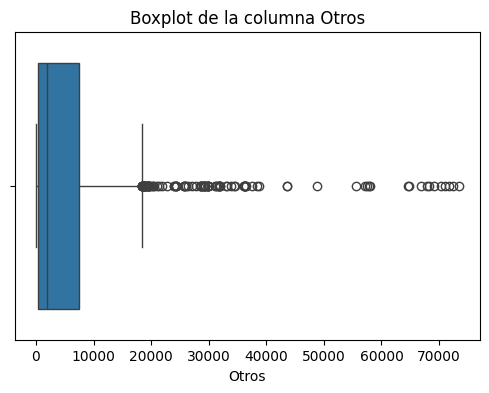

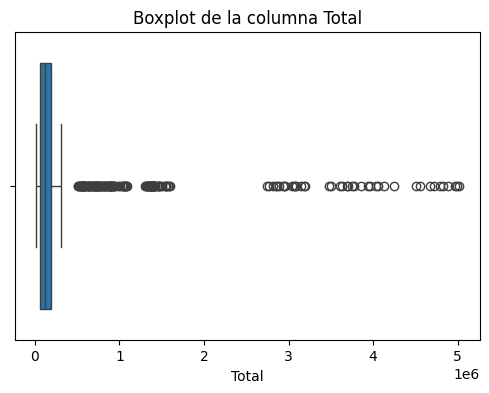

In [51]:
# Visualizar valores atípicos con un gráfico de caja
for columna in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[columna])
    plt.title(f"Boxplot de la columna {columna}")
    plt.show()

In [52]:
# Mostrar la cantidad de valores nulos por columna
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
Año                74
Trimestre           0
Provincia           2
ADSL                2
Cablemodem          2
Fibra óptica        2
Wireless            2
Otros               2
Total               2
Trimestre_Label     0
dtype: int64


In [53]:
# Visualizar distribuciones de columnas con valores negativos
for columna in columnas_negativas:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[columna], kde=True, bins=20)
    plt.title(f"Distribución de la columna '{columna}' con valores negativos")
    plt.show()

In [54]:
# Contar cuántos valores negativos hay en cada columna
for columna in columnas_negativas:
    negativos = df[columna] < 0
    print(f"\nValores negativos en la columna '{columna}': {negativos.sum()}")

In [55]:
# Reemplazar valores negativos por NaN
df.loc[df.select_dtypes(include=[np.number]).lt(0).any(axis=1), columnas_negativas] = np.nan
print("\nValores negativos reemplazados por NaN.")


Valores negativos reemplazados por NaN.


In [56]:
# Confirmar que los valores negativos han sido reemplazados por NaN
print("\nConfirmando reemplazo de valores negativos por NaN:")
print(df.isnull().sum())


Confirmando reemplazo de valores negativos por NaN:
Año                74
Trimestre           0
Provincia           2
ADSL                2
Cablemodem          2
Fibra óptica        2
Wireless            2
Otros               2
Total               2
Trimestre_Label     0
dtype: int64


In [57]:
# Guardar los cambios en el mismo archivo CSV
df.to_csv(ruta_completa, index=False)
print(f"\nArchivo guardado: {ruta_completa}")


Archivo guardado: C:\Users\USUARIO\OneDrive - Secretaria de Educacion del Distrito\Escritorio\SOYhENRY\PROYECTO_IND_2\DATASET_LIMPIO\Accesos Por Tecnología.csv


In [58]:
# 16: Análisis de distribuciones (skewness y kurtosis)

# Excluir la columna 'Año' de las columnas numéricas
df_numerico_sin_ano = df.select_dtypes(include=[np.number])

print("\nSkewness (Asimetría) de las columnas numéricas:")
print(df_numerico_sin_ano.skew())

print("\nKurtosis (Curtosis) de las columnas numéricas:")
print(df_numerico_sin_ano.kurtosis())


Skewness (Asimetría) de las columnas numéricas:
Trimestre      -0.102307
ADSL            4.661572
Cablemodem      3.869341
Fibra óptica    7.075133
Wireless        3.262511
Otros           3.106073
Total           3.883395
dtype: float64

Kurtosis (Curtosis) de las columnas numéricas:
Trimestre       -1.139547
ADSL            23.906101
Cablemodem      16.019831
Fibra óptica    56.751358
Wireless        12.686098
Otros           11.805812
Total           15.918066
dtype: float64


In [59]:
# 17: Verificar la existencia de multicolinealidad entre variables numéricas
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calcular VIF para variables numéricas
X = df.select_dtypes(include=[np.number])

# Rellenar valores NaN con la media de la columna
X = X.fillna(X.mean())

X = add_constant(X)
vif = pd.DataFrame()
vif['Variable'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVIF (Factor de Inflación de la Varianza):")
print(vif)



VIF (Factor de Inflación de la Varianza):
       Variable       VIF
0         const  5.046572
1     Trimestre  1.004131
2          ADSL       inf
3    Cablemodem       inf
4  Fibra óptica       inf
5      Wireless       inf
6         Otros       inf
7         Total       inf


c:\Program Files\Python313\Lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


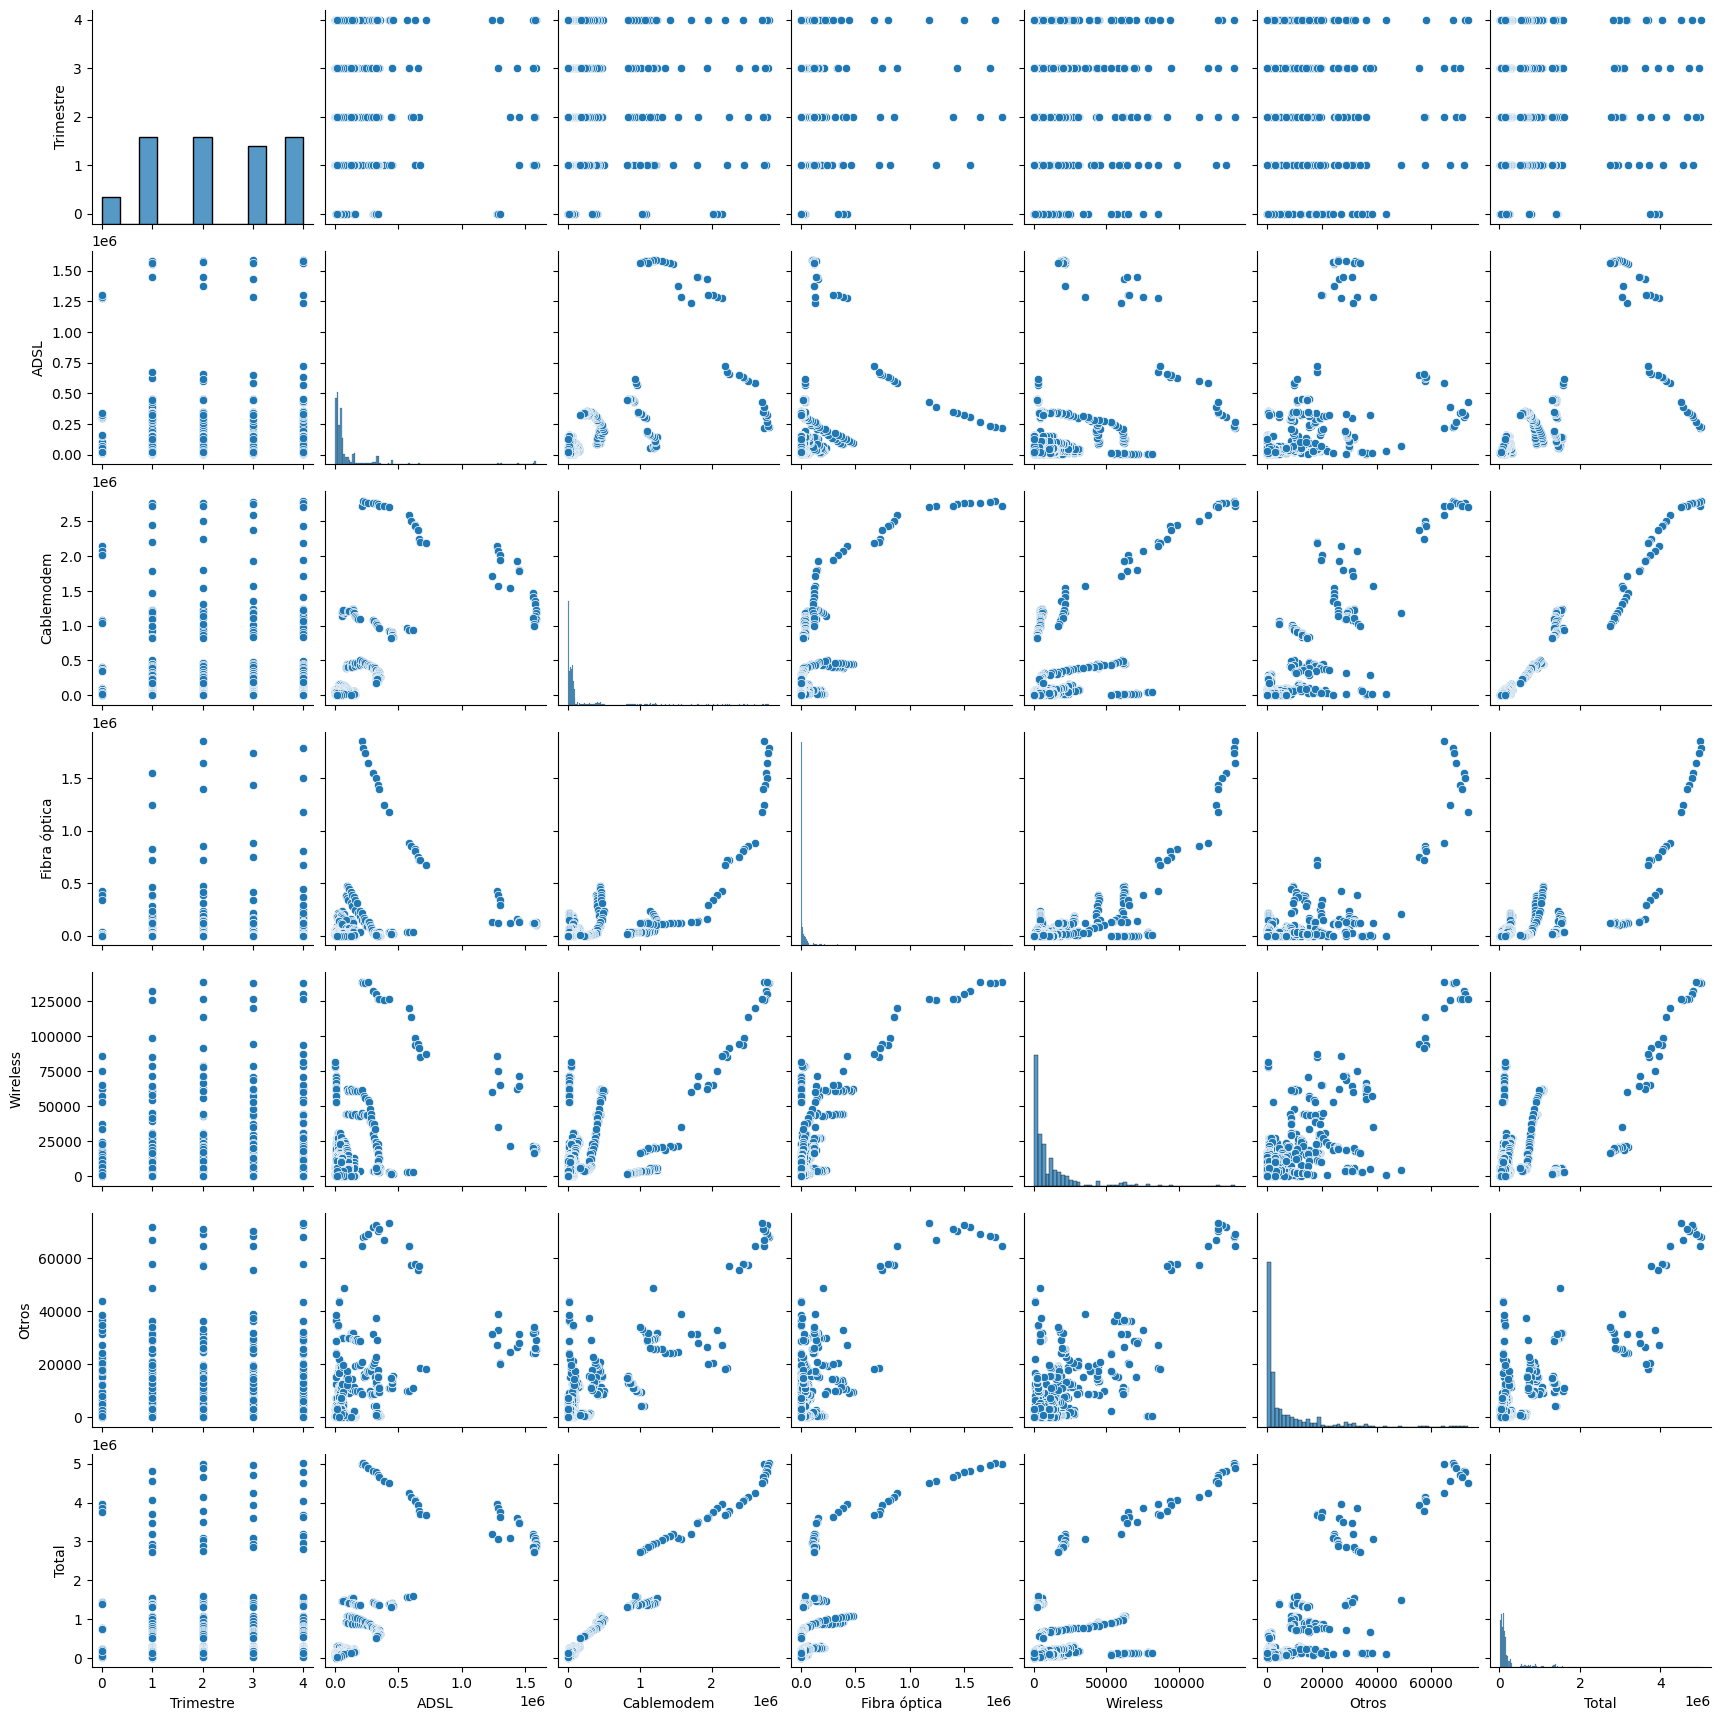

In [60]:
# 18: Visualizar la relación entre variables
sns.pairplot(df.select_dtypes(include=[np.number]))
plt.show()

In [61]:
# 19: Agrupamiento por categorías
for columna in df.select_dtypes(include=['object']).columns:
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(df.groupby(columna).describe())


Estadísticas por grupo de 'Año':
           Trimestre                                                 ADSL  \
               count      mean       std  min   25%  50%   75%  max count   
Año                                                                         
2014-01-01      96.0  2.500000  1.123903  1.0  1.75  2.5  3.25  4.0  96.0   
2015-01-01      96.0  2.500000  1.123903  1.0  1.75  2.5  3.25  4.0  96.0   
2016-01-01      96.0  2.500000  1.123903  1.0  1.75  2.5  3.25  4.0  96.0   
2017-01-01      96.0  2.500000  1.123903  1.0  1.75  2.5  3.25  4.0  96.0   
2018-01-01      96.0  2.500000  1.123903  1.0  1.75  2.5  3.25  4.0  96.0   
2019-01-01      24.0  4.000000  0.000000  4.0  4.00  4.0  4.00  4.0  24.0   
2020-01-01      96.0  2.500000  1.123903  1.0  1.75  2.5  3.25  4.0  96.0   
2021-01-01      96.0  2.500000  1.123903  1.0  1.75  2.5  3.25  4.0  96.0   
2022-01-01      96.0  2.500000  1.123903  1.0  1.75  2.5  3.25  4.0  96.0   
2023-01-01      96.0  2.500000  1.123903  

In [62]:
# 20: Verificar duplicados

print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
1



Estadísticas por grupo de 'Año':
            Trimestre           ADSL     Cablemodem   Fibra óptica  \
Año                                                                  
2014-01-01   2.500000  155049.479167  103907.156250    6300.645833   
2015-01-01   2.500000  157455.145833  116280.947917    6467.468750   
2016-01-01   2.500000  157018.895833  126844.666667    7084.656250   
2017-01-01   2.500000  152492.729167  147375.656250    7982.416667   
2018-01-01   2.500000  145645.666667  172617.416667   11240.875000   
2019-01-01   4.000000  100607.291667  203494.541667   39220.625000   
2020-01-01   2.500000   94508.625000  213957.958333   48298.125000   
2021-01-01   2.500000   81271.291667  238302.187500   67432.354167   
2022-01-01   2.500000   59502.322917  251271.531250  113280.562500   
2023-01-01   2.500000   41095.947917  250428.072917  149211.458333   
2024-01-01   1.510638   27758.914894  192846.765957  135873.319149   

                Wireless         Otros          Total  

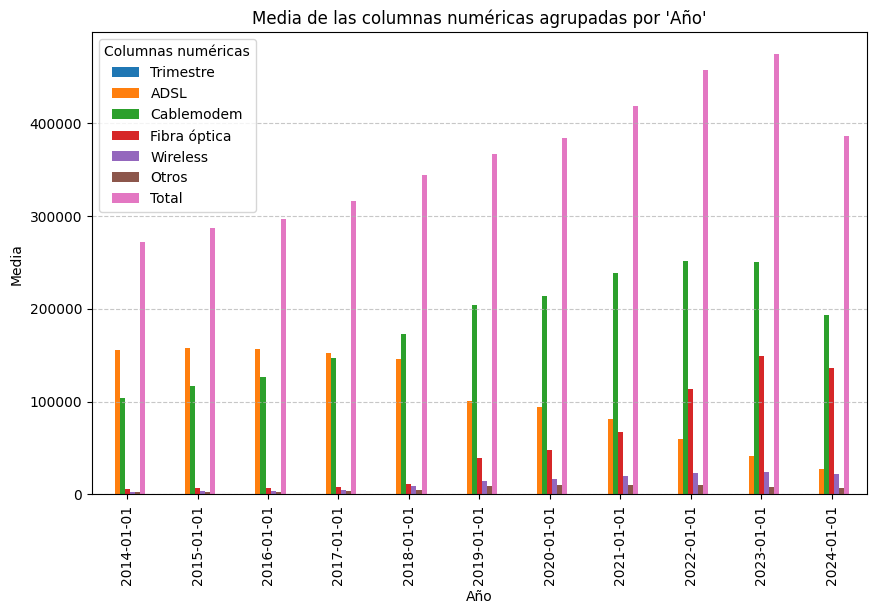


Estadísticas por grupo de 'Provincia':
                     Trimestre           ADSL    Cablemodem   Fibra óptica  \
Provincia                                                                    
BUENOS AIRES          2.325301  656118.421687  1.497288e+06  336438.638554   
CATAMARCA             2.309524   21196.000000  5.015857e+03   15549.928571   
CHACO                 2.309524   43950.023810  4.467529e+04   17697.380952   
CHUBUT                2.309524   44338.952381  3.097721e+04    5533.833333   
CORRIENTES            2.309524   47442.904762  4.922371e+04    8018.142857   
CÓRDOBA               2.309524  275394.380952  3.667386e+05  122107.833333   
ENTRE RÍOS            2.309524   88889.738095  9.256955e+04   16365.928571   
FORMOSA               2.309524   19377.214286  1.042748e+04    3956.690476   
JUJUY                 2.309524   27923.904762  2.909938e+04   13271.904762   
LA PAMPA              2.309524   11546.809524  5.133271e+04   12560.238095   
LA RIOJA              2.

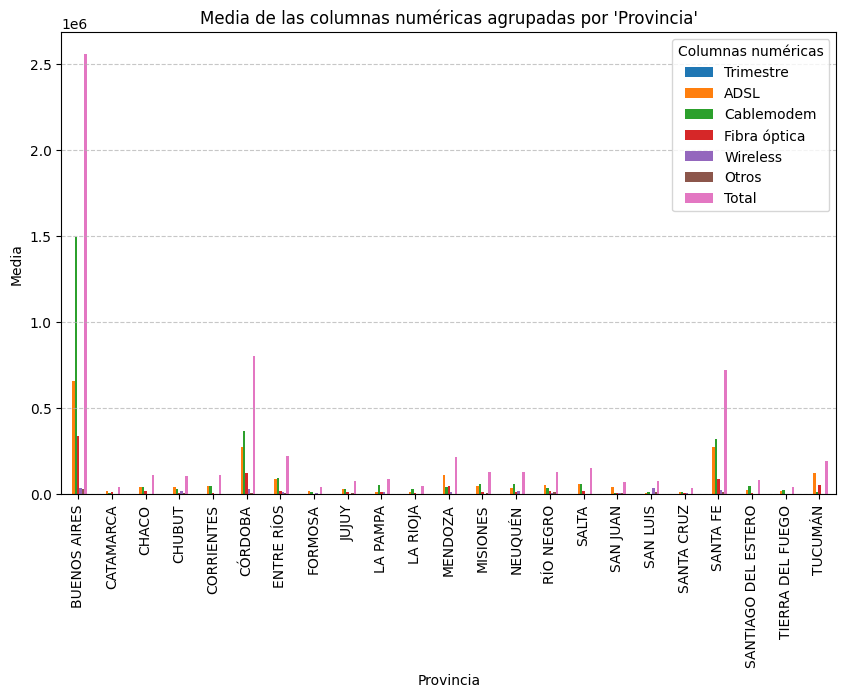


Estadísticas por grupo de 'Trimestre_Label':
                 Trimestre           ADSL     Cablemodem  Fibra óptica  \
Trimestre_Label                                                          
Q1                     1.0  110093.753138  170460.564854  45900.891213   
Q2                     2.0  108591.562500  184023.016667  57546.891667   
Q3                     3.0  115424.148148  183239.481481  47437.828704   
Q4                     4.0  111004.566667  187820.654167  51499.437500   
Sin etiqueta           0.0  135753.930556  192654.236111  20956.694444   

                     Wireless        Otros          Total  
Trimestre_Label                                            
Q1               11895.665272  6006.004184  344356.878661  
Q2               12937.133333  6116.691667  369215.295833  
Q3               12258.912037  6218.532407  364578.902778  
Q4               12964.320833  6665.975000  369954.954167  
Sin etiqueta     12815.097222  9667.263889  371847.222222  


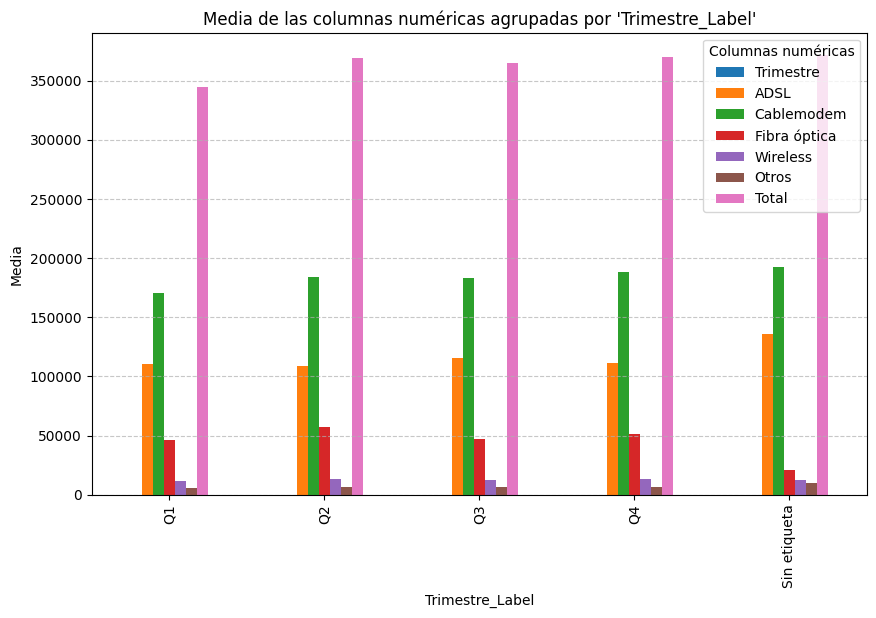

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Iterar sobre las columnas categóricas
for columna in df.select_dtypes(include=['object']).columns:
    # Seleccionar solo las columnas numéricas
    columnas_numericas = df.select_dtypes(include=['number']).columns
    
    # Calcular la media de las columnas numéricas agrupadas por la columna categórica
    stats_por_grupo = df.groupby(columna)[columnas_numericas].mean()
    
    print(f"\nEstadísticas por grupo de '{columna}':")
    print(stats_por_grupo)
    
    # Graficar las estadísticas
    stats_por_grupo.plot(kind='bar', figsize=(10, 6))
    plt.title(f"Media de las columnas numéricas agrupadas por '{columna}'")
    plt.xlabel(columna)
    plt.ylabel("Media")
    plt.legend(title="Columnas numéricas")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [ ]:
# Cuaderno de Análisis y Limpieza de Datos

Este cuaderno de Jupyter contiene un proceso integral de análisis y limpieza de datos aplicado al conjunto de datos denominado **"Accesos Por Tecnología.csv"**. El objetivo principal es garantizar que los datos sean claros, consistentes y estén preparados para análisis posteriores. 

## Tabla de Contenidos

1. [Carga y Normalización de Datos](#carga-y-normalización-de-datos)
2. [Gestión de Valores Faltantes e Incorrectos](#gestión-de-valores-faltantes-e-incorrectos)
3. [Creación de Etiquetas Descriptivas](#creación-de-etiquetas-descriptivas)
4. [Información Básica de los Datos](#información-básica-de-los-datos)
5. [Normalización de Nombres de Columnas](#normalización-de-nombres-de-columnas)
6. [Reemplazo de Variaciones Específicas](#reemplazo-de-variaciones-específicas)
7. [Estadísticas Descriptivas y Análisis Exploratorio](#estadísticas-descriptivas-y-análisis-exploratorio)
8. [Análisis de Correlación](#análisis-de-correlación)
9. [Tablas de Contingencia](#tablas-de-contingencia)
10. [Cálculo de Z-Scores](#cálculo-de-z-scores)
11. [Detección de Valores Atípicos](#detección-de-valores-atípicos)
12. [Gestión de Valores Negativos](#gestión-de-valores-negativos)
13. [Guardado de los Datos Limpios](#guardado-de-los-datos-limpios)
14. [Análisis de Distribución](#análisis-de-distribución)
15. [Revisión de Multicolinealidad](#revisión-de-multicolinealidad)
16. [Visualización de Relaciones entre Variables](#visualización-de-relaciones-entre-variables)
17. [Agrupamiento y Agregación](#agrupamiento-y-agregación)
18. [Revisión de Duplicados](#revisión-de-duplicados)
19. [Cómo Ejecutar el Cuaderno](#cómo-ejecutar-el-cuaderno)
20. [Conclusión](#conclusión)

---

## Carga y Normalización de Datos

Se carga el conjunto de datos desde una ruta específica y se realiza una normalización de los nombres de las columnas para facilitar su manipulación.

## Gestión de Valores Faltantes e Incorrectos

Se identifican y manejan valores faltantes y errores, convirtiendo columnas a tipos numéricos, gestionando valores negativos y reemplazando valores ausentes con alternativas adecuadas.

## Creación de Etiquetas Descriptivas

Se generan etiquetas descriptivas para columnas clave, mejorando la comprensión de los datos.

## Información Básica de los Datos

Se muestran estadísticas básicas como tipos de datos y el número de valores no nulos en cada columna.

## Normalización de Nombres de Columnas

Los nombres de las columnas se normalizan eliminando espacios en blanco y convirtiéndolos a mayúsculas.

## Reemplazo de Variaciones Específicas

Se reemplazan variaciones específicas en los valores de las columnas para garantizar la consistencia.

## Estadísticas Descriptivas y Análisis Exploratorio

Se calculan estadísticas descriptivas y se realizan análisis exploratorios mediante visualizaciones como histogramas.

## Análisis de Correlación

Se calcula la correlación entre columnas numéricas y se visualiza con un mapa de calor.

## Tablas de Contingencia

Se generan tablas de contingencia para analizar relaciones entre columnas categóricas.

## Cálculo de Z-Scores

Se calculan z-scores para identificar valores atípicos en columnas numéricas.

## Detección de Valores Atípicos

Se detectan valores atípicos mediante gráficos de caja (boxplots).

## Gestión de Valores Negativos

Se identifican y manejan valores negativos en columnas numéricas de forma adecuada.

## Guardado de los Datos Limpios

El conjunto de datos limpio se guarda en un archivo CSV para usos futuros.

## Análisis de Distribución

Se evalúan la asimetría y curtosis de las columnas numéricas para comprender sus distribuciones.

## Revisión de Multicolinealidad

Se analiza la multicolinealidad entre variables numéricas utilizando el Factor de Inflación de la Varianza (VIF).

## Visualización de Relaciones entre Variables

Se exploran relaciones entre variables mediante gráficos de pares (pair plots).

## Agrupamiento y Agregación

Se agrupan datos por columnas categóricas y se calculan estadísticas para cada grupo.

## Revisión de Duplicados

Se revisa el conjunto de datos para identificar y manejar filas duplicadas.

---

## Cómo Ejecutar el Cuaderno

1. Asegúrate de tener instaladas las bibliotecas necesarias:
    ``
    pip install pandas numpy matplotlib seaborn scipy statsmodels
    ```
2. Coloca el archivo **"Accesos Por Tecnología.csv"** en la ruta especificada.
3. Ejecuta las celdas del cuaderno en orden para realizar el proceso completo de limpieza y análisis.

---

## Conclusión

Este cuaderno proporciona un enfoque detallado y sistemático para la limpieza y análisis de datos, asegurando que el conjunto esté listo para un análisis más profundo o modelado. ¡Gracias por utilizar este recurso!